In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from Data_preparation_Library import *
from scipy import signal

In [3]:
from tsfresh import extract_relevant_features
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.preprocessing import StandardScaler
import io

def tsf_sampler(subj):
    file = 'Subjects/{}/computed_Bulb.csv'.format(subj)
    df = pd.read_csv(file,index_col=0)
    df = df[20000:24000]
    # X, y1 = prep_data_velocity(df,250,interval=10,Normalize=False,rms=False,angle_label ='Pronation_Angle')

    emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
    emg_df = df[emg_labels]
    df = filter_df([df])[0]
    arr = np.diff(list(df['Pronation_Angle'])+[list(df['Pronation_Angle'].values)[-1]])
    arr = arr/(1/2000)
    b,a = signal.butter(3, 1,fs=2000)
    arr = signal.lfilter(b, a,arr)
    y = arr
#     pd.DataFrame(arr).plot(figsize=(16,5),title='Velocity',grid=True)
#     emg_df.plot(figsize=(16,5))
    return emg_df,y

def tsf_feature_selector():
    subjects = ['Ingy','Nikhil','Fazil','Abhishek','Deepti','Nirmayee','Varun','Jai']
    features_infos = []
    for subj in tqdm(subjects):
        emg_df,y = tsf_sampler(subj)
        t = np.linspace(0,int(emg_df.shape[0]/2000),emg_df.shape[0])
        emg_df['time'] = t
#         y = pd.Series(y)
        extracted_features = extract_features(emg_df,column_id='time')
        impute(extracted_features)
        features_filtered = select_features(extracted_features, y)
        text_file = open("feature_infos.txt", "a")
        text_file.write(str(features_filtered.columns.to_list())+'\n')
        text_file.close()

def tsf_feature_selector_whole():
    emg_labels = ['EMG1', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6','EMG7', 'EMG8']
    angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
    y_all = []
    emg_df_all = pd.DataFrame(columns=emg_labels)
    subjects = ['Ingy','Nikhil','Fazil','Abhishek','Deepti','Nirmayee','Varun','Jai']
    for subj in tqdm(subjects):
        edf,y = tsf_sampler(subj)
        y_all = y_all + list(y)
        emg_df_all = emg_df_all.append(edf)  
    emg_df_all.to_csv('prepared_data/emg_df_all_norm.csv')
    
    scaler = StandardScaler()
    vals = scaler.fit_transform(emg_df_all)
    emg_df_all = pd.DataFrame(data=vals,columns=emg_labels)
    t = np.linspace(0,int(emg_df_all.shape[0]/2000),emg_df_all.shape[0])
    emg_df_all['time'] = t
    extracted_features = extract_features(emg_df_all,column_id='time')
    impute(extracted_features)
    y_all = np.array(y_all)
    features_filtered = select_features(extracted_features, y_all)
    features_filtered.to_csv('prepared_data/features_filtered_norm.csv')
    return features_filtered

In [ ]:
tsf = tsf_feature_selector_whole()
tsf

In [33]:
tsf = pd.read_csv('prepared_data/features_filtered_norm.csv',index_col=0)
tsf

,EMG4__range_count__max_1__min_-1,EMG5__range_count__max_1__min_-1,EMG3__range_count__max_1__min_-1,EMG1__abs_energy,EMG1__root_mean_square,"EMG1__fft_coefficient__attr_""abs""__coeff_0",EMG2__range_count__max_1__min_-1,EMG7__range_count__max_1__min_-1,EMG1__range_count__max_1__min_-1,"EMG2__fft_coefficient__attr_""abs""__coeff_0",...,EMG8__count_below__t_0,EMG8__range_count__max_1000000000000.0__min_0,"EMG8__fft_coefficient__attr_""angle""__coeff_0",EMG8__count_above__t_0,EMG6__count_below__t_0,EMG6__count_above__t_0,EMG6__range_count__max_1000000000000.0__min_0,"EMG6__fft_coefficient__attr_""angle""__coeff_0",EMG8__benford_correlation,EMG5__benford_correlation
0.0000,1.0,1.0,1.0,0.004970,0.070496,0.070496,1.0,1.0,1.0,0.145731,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,180.0,0.062915,-0.200946
0.0005,1.0,1.0,1.0,0.002558,0.050581,0.050581,1.0,1.0,1.0,0.107393,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,180.0,0.864123,-0.145280
0.0010,1.0,1.0,1.0,0.000248,0.015732,0.015732,1.0,1.0,1.0,0.071297,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.295657,0.864123
0.0015,1.0,1.0,1.0,0.003662,0.060514,0.060514,1.0,1.0,1.0,0.112685,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.864123,0.062915
0.0020,1.0,1.0,1.0,0.025896,0.160923,0.160923,1.0,1.0,1.0,0.194959,...,1.0,0.0,180.0,0.0,0.0,1.0,1.0,0.0,0.864123,-0.064614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.9980,1.0,1.0,1.0,0.103131,0.321141,0.321141,1.0,1.0,1.0,0.474899,...,1.0,0.0,180.0,0.0,1.0,0.0,0.0,180.0,0.062915,0.864123
15.9985,1.0,1.0,1.0,0.392592,0.626572,0.626572,1.0,1.0,1.0,0.275689,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.062915,0.864123
15.9990,1.0,1.0,1.0,0.741304,0.860990,0.860990,1.0,1.0,1.0,0.132377,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.145280,-0.272809
15.9995,1.0,1.0,1.0,0.438550,0.662231,0.662231,1.0,1.0,1.0,0.290421,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.062915,-0.241690


In [34]:
tsf_columns = tsf.columns.to_list()
tsf_columns

['EMG4__range_count__max_1__min_-1',
 'EMG5__range_count__max_1__min_-1',
 'EMG3__range_count__max_1__min_-1',
 'EMG1__abs_energy',
 'EMG1__root_mean_square',
 'EMG1__fft_coefficient__attr_"abs"__coeff_0',
 'EMG2__range_count__max_1__min_-1',
 'EMG7__range_count__max_1__min_-1',
 'EMG1__range_count__max_1__min_-1',
 'EMG2__fft_coefficient__attr_"abs"__coeff_0',
 'EMG2__root_mean_square',
 'EMG2__abs_energy',
 'EMG7__abs_energy',
 'EMG7__root_mean_square',
 'EMG7__fft_coefficient__attr_"abs"__coeff_0',
 'EMG6__range_count__max_1__min_-1',
 'EMG8__range_count__max_1__min_-1',
 'EMG5__abs_energy',
 'EMG5__fft_coefficient__attr_"abs"__coeff_0',
 'EMG5__root_mean_square',
 'EMG8__fft_coefficient__attr_"abs"__coeff_0',
 'EMG8__abs_energy',
 'EMG8__root_mean_square',
 'EMG6__root_mean_square',
 'EMG6__abs_energy',
 'EMG6__fft_coefficient__attr_"abs"__coeff_0',
 'EMG4__abs_energy',
 'EMG4__root_mean_square',
 'EMG4__fft_coefficient__attr_"abs"__coeff_0',
 'EMG4__count_above__t_0',
 'EMG4__coun

# Common Feature Occurance

In [35]:
# key = 'abs_energy'
keys = ['abs_energy','root_mean_square','fft_coefficient','benford_correlation','quantile','cwt_coefficients']
key_counts = []
for key in keys:
    key_count = 0
    for feature in tsf_columns:
        if key in feature:
            key_count=key_count+1
    key_counts.append(key_count)
for i in range(len(keys)):
    print(keys[i],'-->',key_counts[i])
#             print(feature)
#     print('Total Feature Occurance',key_count)

abs_energy --> 7
root_mean_square --> 7
fft_coefficient --> 13
benford_correlation --> 3
quantile --> 8
cwt_coefficients --> 4


## Number of Features per EMG Channel

In [36]:
emg_labels = ['EMG1', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6','EMG7', 'EMG8']
key_counts = []
for key in emg_labels:
    key_count = 0
    for feature in tsf_columns:
        if key in feature:
            key_count=key_count+1
    key_counts.append(key_count)
for i in range(len(emg_labels)):
    print(emg_labels[i],'-->',key_counts[i])

EMG1 --> 4
EMG2 --> 4
EMG3 --> 5
EMG4 --> 8
EMG5 --> 5
EMG6 --> 9
EMG7 --> 8
EMG8 --> 27


EMG1__fft_coefficient__attr_"abs"__coeff_0


<AxesSubplot:>

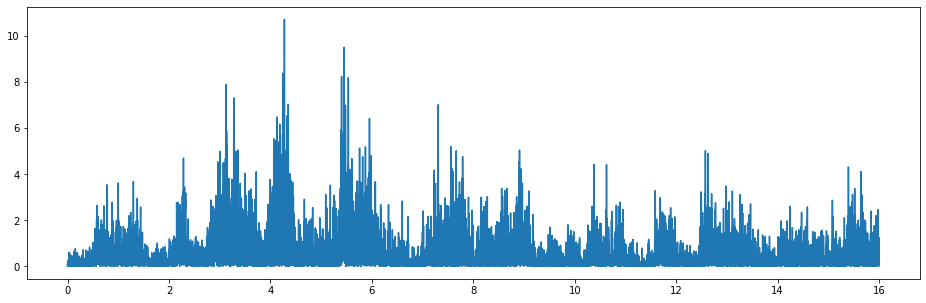

In [28]:
col = 'EMG1__fft_coefficient__attr_"abs"__coeff_0'
print(col)
tsf[col].plot(figsize=(16,5))